Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      561 non-null    datetime64[ns]
 1   y       561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


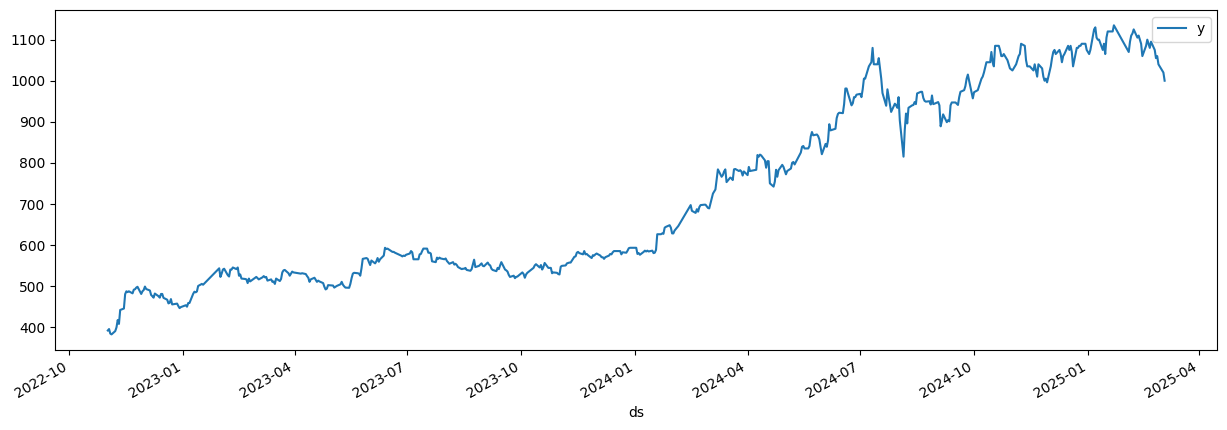

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed
# set_log_level("ERROR")

df = pd.read_csv('2330_stock_data.csv', parse_dates=['ds'])[['ds', 'y']]
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [ ]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
# set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    # n_changepoints=0,
    n_lags=10,
)
# Use static plotly in notebooks
# m.set_plotting_backend("plotly-static")
m.set_plotting_backend("matplotlib")

metrics = m.fit(df)

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.078% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (18) is too small than the required number                     for the learning rate finder (220). The results might not be optimal.


Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 17. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

In [3]:
metrics

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.145198,0.0,1135.646973,1367.293945,1.150256,0.0,0
1,0.977963,0.0,980.250000,1211.807007,0.975664,0.0,1
2,0.812665,0.0,833.637451,1061.799194,0.812789,0.0,2
3,0.653889,0.0,693.182922,913.152222,0.653339,0.0,3
4,0.503556,0.0,554.334290,765.099426,0.502849,0.0,4
...,...,...,...,...,...,...,...
135,0.001702,0.0,18.473373,24.521425,0.001680,0.0,135
136,0.001704,0.0,18.597462,24.605841,0.001690,0.0,136
137,0.001701,0.0,18.671537,24.372515,0.001708,0.0,137
138,0.001700,0.0,18.747597,24.477474,0.001705,0.0,138


WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.078% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



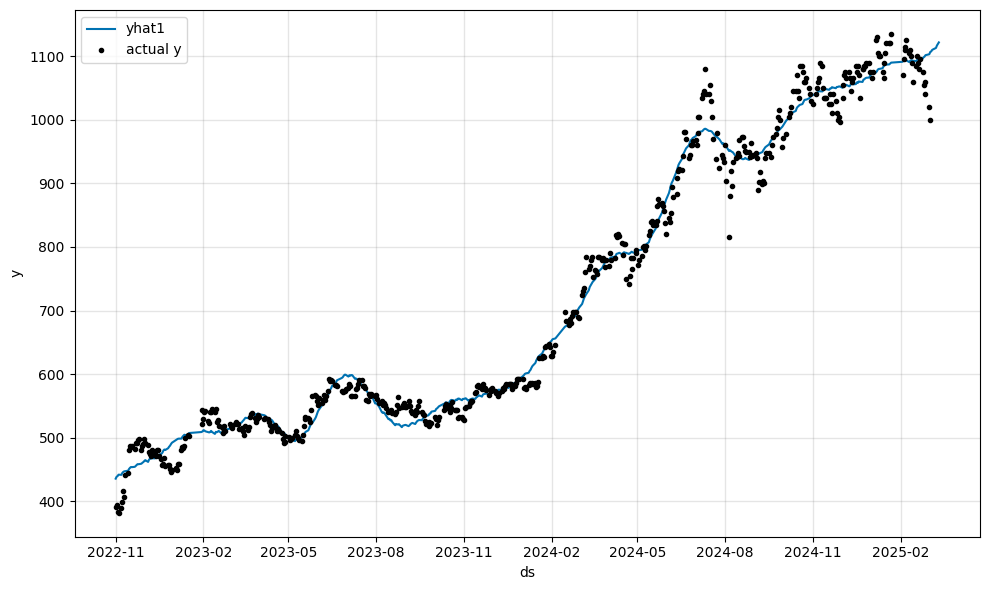

In [4]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:561: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y["ds"].dt.to_pydatetime(),

WARNING - (py.warnings._showwarnmsg) - c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  days_i = pd.date_range(start="2017-01-01", periods=week_days * 24, freq="H") + p

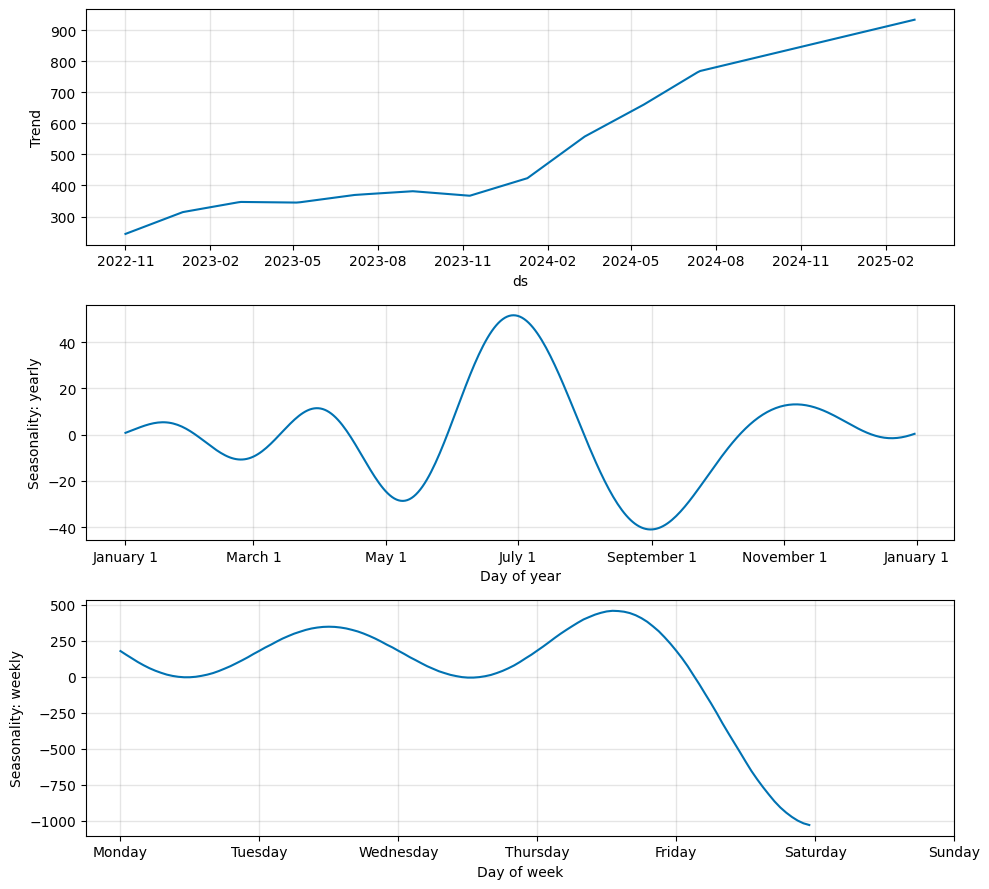

In [ ]:
m.plot_parameters(components=["trend", "seasonality","autoregression"])

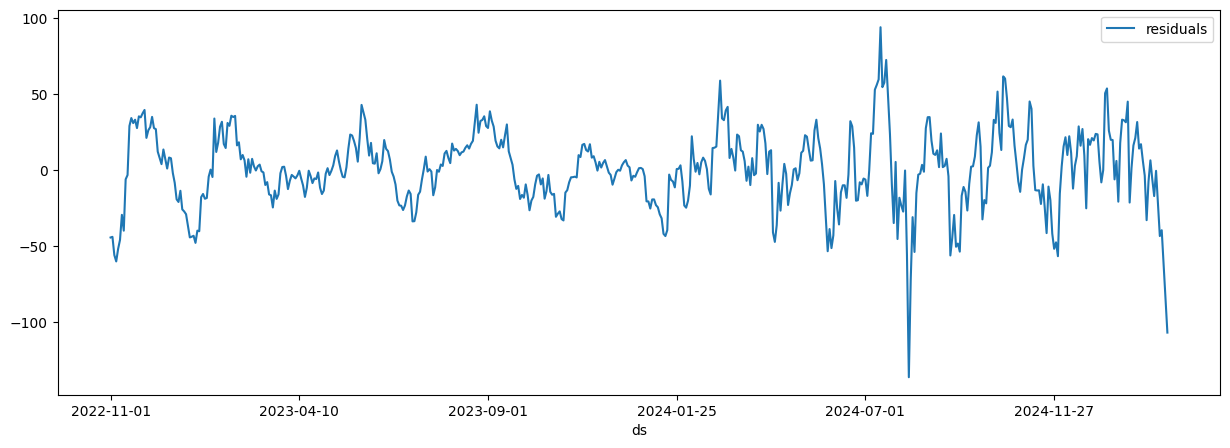

In [6]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(15, 5))